In [1]:
#먼저 필요한 패키지를 가져옵니다.
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
abalone_columns = list()
for l in open('data/abalone_attributes.txt'):
    abalone_columns.append(l.strip())

# abalone_attributes.txt 파일에서 데이터를 가져와서 l 이라는 곳에 strip 부분을 추가한다.    
    
abalone_columns

data = pd.read_csv('data/abalone.txt',header=None, names=abalone_columns)
#data 폴더의 abalone.txt 를 가져온다, 헤더는 없다, names 는 abalone_columns 이다.

In [3]:
label = data['Sex']

In [4]:
data.head()
#앞부분의 5개 정도의 데이터만 보여주는 코드 .head()
# M = male , F= female , I= 아직 성별이 정해지지않았다.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data.shape

(4177, 9)

In [6]:
del data['Sex']
#del : 삭제하는 명령어. data의 Sex 항목을 삭제한다.

In [7]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
data.describe()
# describe: 데이터의 정보를 한눈에 확인하는 명령어.
# count : 데이터의 갯수, mean : 평균 ,std : 표준편차, min:최소값  max :최대값, 25,50,75% : 해당 % 위치의 데이터값

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
data.info()
# info : 전체 데이터의 형태를 보는 명령어 (데이터 타입을 확인한다.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [10]:
data = (data - np.min(data))/(np.max(data)-np.min(data))
#스케일링, 모든 데이터를 0~1사이 값으로 변경한다.

In [11]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


In [12]:
from sklearn.preprocessing import MinMaxScaler
# min max 스케일러를 sklearn 에서 불러온다.

In [13]:
mMscaler = MinMaxScaler()
#min max scaler 를 앞으로 mMscaler 로 사용한다.

In [14]:
#mMscaler.fit(data)
# fit 을 통해서 mMscaler 가 작동했다. , fit 으로 변환을 적용시킨다.(fit 을 데이터에 적용만 시킨다.)

In [15]:
mMscaled_data = mMscaler.fit_transform(data);
# fit_transform  : 실제로 변환 시킨다. (fit 의 데이터를 실제로 변환시키는건 transform 이다) 
# fit 적용시키고 transform 변환시킨다. 한 코드로 이루어진다. fit_transform 

In [16]:
mMscaled_data
#type 로 numpy 계열이라는것을 확인할수있다.

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

In [17]:
from sklearn.preprocessing import StandardScaler
# Standard 스케일러를 불러온다.
sdscaler = StandardScaler()
#

In [18]:
sdscaled_data = sdscaler.fit_transform(data)

In [19]:
sdscaled_data

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471, -0.28962385],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [20]:
!pip install imblearn
#imblearn 을 설치한다

In [21]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# imblearn 에서 오버샘플링, 언더샘플링을 활성화한다.

In [22]:
ros = RandomOverSampler()
rus = RandomUnderSampler()
#이름을 ros, rus로 줄인다.

In [23]:
data.shape

(4177, 8)

In [24]:
oversampled_data, oversampled_label = ros.fit_resample(data,label)
# data 와 label 에 각각 oversample 로 리샘플을 한다.
oversampled_data = pd.DataFrame(oversampled_data,columns= data.columns)

In [25]:
oversampled_data.shape

(4584, 8)

In [26]:
undersampled_data,undersampled_label = rus.fit_resample(data,label)

In [27]:
undersampled_data.shape

(3921, 8)

In [28]:
from sklearn.datasets import make_classification
# classification 을 할수 있는 데이터셋을 생성해준다. 분류용 데이터
data ,label = make_classification(
n_samples=1000, 
    n_classes=3 ,
    n_features=2,
    n_repeated=0,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.05,0.15,0.8], 
    class_sep=1, 
    random_state=2022
)
# 랜덤 샘플을 n_sample = 1000, 1천개, 
#n_classes = 3 분류하고자 하는 카테고리의 갯수. 3개 
# weights =[0.05,0.15,0.8] 구성비를 설정할수있다 (합쳐서 1이 되어야한다)
# class_sep=0.8 떨어저있는 거리 , 숫자가 커질수록 간격이 벌어진다.
# random_state=2022 랜덤의 시드값
# n_clusters_per_class=1 : 클러스터 안에 클래스가 1개씩만 들어가겠다.

# features 를 지정하고 random_state 를 실행하면 오류가 날수있다. 
#n_repeated=0 반복이 없어야 한다는 의미로 추가한다.
# n_informative=2  : 데이터들이 서로 얼마나 관련이 있는가를 설정한다 
# n_redundant=0 : 얼마나 중복으로 사용하는가를 한다. 0으로 한다.


In [29]:
data.shape

(1000, 2)

In [30]:
data

array([[-2.11117507,  0.70864868],
       [ 0.03908554, -2.1966176 ],
       [ 0.61063734, -1.29651695],
       ...,
       [-0.94729639, -1.26505046],
       [ 0.98391513, -1.8661851 ],
       [ 0.15128065,  2.68764856]])

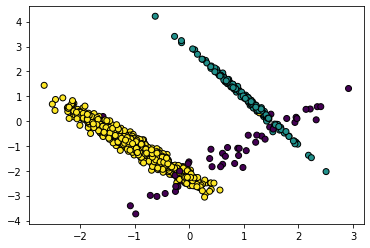

In [31]:
plt.scatter(data[:,0],data[:,1],c=label,linewidth=1, edgecolor='black')

In [32]:
from imblearn.over_sampling import SMOTE
# SMOTE를 활성화한다.
smote = SMOTE(k_neighbors=5)
# 접근점을 5개를 설정한다.

In [33]:
smoted_data, smoted_label = smote.fit_resample(data,label)

In [34]:
data.shape

(1000, 2)

In [35]:
smoted_data.shape

(2382, 2)

In [36]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(smoted_label).sum()))
# label 을 기준으로 더미데이터를 얻어내서 그 합계를 구한다.
# 이를 통해 SMOTE 는 제일 큰 값을 기준으로 다른 두개의 데이터의 갯수를 맞춘다는것을 알수있다.

원본 데이터의 클래스 비율 
0     54
1    152
2    794
dtype: int64

SMOTE 결과 
0    794
1    794
2    794
dtype: int64


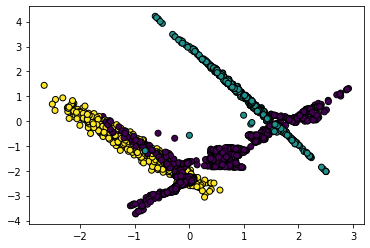

In [37]:
plt.scatter(smoted_data[:,0],smoted_data[:,1], c=smoted_label , linewidth=1,edgecolor='k')

In [38]:
from sklearn.datasets import load_digits
digits = load_digits()

In [39]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [40]:
digits.data.shape

(1797, 64)

In [41]:
data = digits.data
label = digits.target

Label : 0


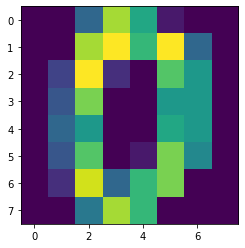

In [42]:
plt.imshow(data[0].reshape(8,8))
# reshape : 첫번째(0번째) 데이터의 모양을 재조정할수있다. (1차원을 2차원으로 변경)
#plt.imshow 로 이미지를 생성해서 보여준다.
print('Label : {}'.format(label[0]))

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# 데이터의 주성분을 몇개로 줄일것인가.의 명령어이다. (2차원으로 만들겠다.)

In [45]:
new_data = pca.fit_transform(data)
# data를 pca로 새로 fit transform 을 진행하였다.

In [46]:
new_data

array([[ -1.25946716,  21.27488331],
       [  7.95761164, -20.76870635],
       [  6.99192339,  -9.95598185],
       ...,
       [ 10.80128208,  -6.96024618],
       [ -4.87209737,  12.4239451 ],
       [ -0.34439086,   6.36555961]])

In [47]:
data.shape

(1797, 64)

In [48]:
new_data.shape

(1797, 2)

In [49]:
new_data[0]

array([-1.25946716, 21.27488331])

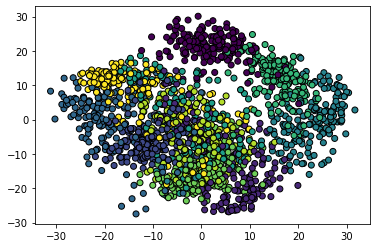

In [53]:
plt.scatter(new_data[:,0],new_data[:,1], c=label, linewidth=1 ,edgecolor='k')

In [54]:
data = pd.read_csv('data/abalone.txt',header=None,
                  names=abalone_columns )

In [55]:
label = data['Sex']

In [56]:
label.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [57]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder 를 활성화한다.
le=LabelEncoder()
#라벨인코더를 앞으로 le 로 쓴다.

In [58]:
label_encoded_label = le.fit_transform(label)

In [64]:
label_encoded_label = le.fit_transform(label)
label_encoded_label.reshape(-1,1)

array([[2],
       [2],
       [0],
       ...,
       [2],
       [0],
       [2]])

In [61]:
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), label_encoded_label.reshape((-1, 1))], axis=1),
columns=['label', 'label_encoded'])
#concatenate : 이전데이터와 encoded 데이터를 함께 보여주는 명령어
# reshaped 를 통하여 그전과 후의 데이터의 형태를 바꿔주지 않으면 오류가 난다.

In [62]:
result

,label,label_encoded
0,M,2
1,M,2
2,F,0
3,M,2
4,I,1
...,...,...
4172,F,0
4173,M,2
4174,M,2
4175,F,0


In [66]:
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder(sparse=False)
# OneHot Encoder를 활성화한다.
# 옵션의 값은 기본값은 True 이다, 이때 Matrix 값이 나온다.
# sparse = False 로 설정하면 배열(array)이 나온다.
# sparse = True 로 설정하고 하면 원하는 형태가 아닌 Matrix 값으로 나온다.

In [69]:
one_hot_encoded = ohe.fit_transform(label.values.reshape(-1,1))
# 1차원 데이터이기때문에 2차원 데이터로 바꾸어 줘야한다.

In [71]:
print(one_hot_encoded)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [72]:
from sklearn.datasets import load_wine
wine = load_wine()

In [73]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [75]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [76]:
data = pd.DataFrame(data,columns=columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [77]:
data.shape

(178, 13)

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)

In [81]:
data.shape

(178, 2)

In [82]:
from sklearn.cluster import KMeans
# K가 몇개 인가 의 의미이다.
kmeans = KMeans(n_clusters=3)
#군집의 갯수를 지정해준다. ( 정확한 갯수는 모르지만 최대한 그에 맞춘다.)

In [83]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [84]:
cluster = kmeans.predict(data)
#predict 예측한다.

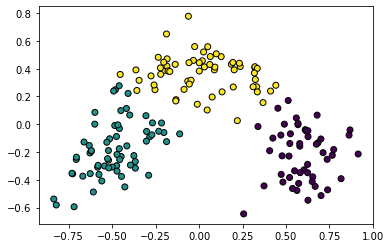

In [89]:
plt.scatter(data[:,0],data[:,1],c=cluster,
           linewidth=1, edgecolor='k')